<a href="https://colab.research.google.com/github/ttuyetdinh/diveintocode-ml/blob/master/Assign_chestboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

In [ ]:
import numpy as np
n_squares = 4
indices_of_squares = np.arange(4)
small_board_ndarray = 2**indices_of_squares
small_board_ndarray=small_board_ndarray.reshape(2,2)
print(small_board_ndarray)

[[1 2]
 [4 8]]


#Problem 2
Broadcast method

In [ ]:
import numpy as np
import math
m=8 #rows
n=8 #columns
def mn_matrix(m=4, n=4):
  mxn_matrix = n*m
  sum=np.uint(0)
  indices_of_squares = np.arange(mxn_matrix,dtype=np.uint)
  board_ndarray = 2**indices_of_squares
  for i in range (0,len(board_ndarray)):
    sum+=board_ndarray[i]  
  board_ndarray=board_ndarray.reshape(n,m)
  return board_ndarray, sum
#print(huge_board_ndarray)
board_ndarray,sum = mn_matrix(8,8)
print("Total wheat in 8x8 chest: {}".format(sum))


Total wheat in 8x8 chest: 18446744073709551615


#Problem 3

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

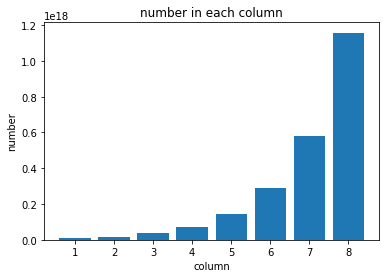

In [ ]:
import numpy as np
import math
m=8 #rows
n=8 #columns
PRINT_MATRIX = 1
PRINT_MEAN_COLUMN = 1
def mn_matrix(m=4, n=4):
  mxn_matrix = n*m
  sum=np.uint(0)
  indices_of_squares = np.arange(mxn_matrix,dtype=np.uint)
  board_ndarray = 2**indices_of_squares
  for i in range (0,len(board_ndarray)):
    sum+=board_ndarray[i]  
  board_ndarray=board_ndarray.reshape(m,n)
  return board_ndarray, sum
board_ndarray,sum = mn_matrix(m,n)
if PRINT_MATRIX: print(board_ndarray)
if PRINT_MEAN_COLUMN: print(board_ndarray.mean(axis=0))
print("Total wheat in mxn chest: {}".format(sum))
#plot code
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,n+1), board_ndarray.mean(axis=0))
plt.show()

#Problem 4

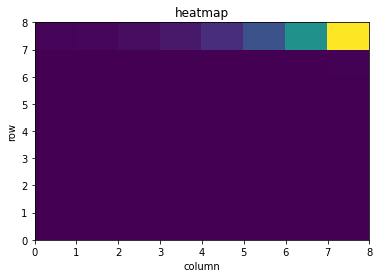

In [ ]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_ndarray)
plt.show()

#Problem 5

In [ ]:
row_sum=board_ndarray.sum(axis=1)
#print(row_sum)
first_half=0
second_half=0
for i in range(int(m/2)):
  first_half+=row_sum[i]
second_half=row_sum.sum()
print("Second half greater than first half: {} times".format(second_half/first_half-1))

Second half greater than first half: 4294967296.0 times


In [ ]:
print(a)

#Problem 6,7

list.append() method

In [1]:
%%timeit
import numpy as np
import math
m=8 #rows
n=8 #columns
def mn_matrix(m=4, n=4):
  mxn_matrix = n*m
  board_list = [1]
  sum=np.uint(0)
  for i in range(mxn_matrix - 1):
    board_list.append(2*board_list[-1]) 
  board_ndarray=np.array(board_list,dtype=np.uint)  
  board_ndarray=board_ndarray.reshape(n,m)
  return board_list, board_ndarray.sum()
board_ndarray,sum = mn_matrix(8,8)
#print("Total wheat in 8x8 chest: {}".format(sum))


The slowest run took 6.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 19.9 µs per loop


np.append() method

In [2]:
%%timeit
import numpy as np
import math
m=8 #rows
n=8 #columns
def mn_matrix(m=4, n=4):
  mxn_matrix = n*m
  board_ndarray = np.array([1],dtype=np.uint)
  sum=np.uint(0)
  for _ in range(mxn_matrix - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1]) 
  board_ndarray=board_ndarray.reshape(n,m)
  return board_ndarray, board_ndarray.sum()
board_ndarray,sum = mn_matrix(8,8)
#print("Total wheat in 8x8 chest: {}".format(sum))

1000 loops, best of 5: 422 µs per loop


broadcast method

In [3]:
%%timeit
import numpy as np
import math
m=8 #rows
n=8 #columns
def mn_matrix(m=4, n=4):
  mxn_matrix = n*m
  sum=np.uint(0)
  indices_of_squares = np.arange(mxn_matrix,dtype=np.uint)
  board_ndarray = 2**indices_of_squares
  board_ndarray=board_ndarray.reshape(n,m)
  return board_ndarray, board_ndarray.sum()
board_ndarray,sum = mn_matrix(8,8)
#print("Total wheat in 8x8 chest: {}".format(sum))


The slowest run took 11.89 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 8 µs per loop


After trying 3 different method:
- We can see that the broadcast method is the fastest becasuse it doesn't use the loop so it can execute multithreading
- Using loop can diable the multithreading so the other methods are slower. Work with list is more faster than array in Python so the list.aapend() method is faster than the ndarray.append() method 